# 

# West Nile Prevalence Prediction - Exploratory Data Analysis 

# Table of Contents
#### [Introduction](#Intro) 
#### [Imports](#Imports)

#### [Data Set ](#set)
- Data Set Description 
- Data Read In

#### [Data Wrangling](#wrang)
- Data Shape
- Data Types 
- New Attributes
- Duplicates
- Missing Values
- Re-Indexing

#### [Initial Data Exploration](#init)
- Numeric Variables
- Categorical Variables

#### [Exploratory Data Analysis](#explo)

#### [Conclusion](#conclu)


## Introduction <a id = Intro a>

Uncovering the patterns of Chicago's Mosquito driven West Nile Virus (WNV) requires taking a holisitic look at factors that influence the virus and the behavior of mosquitos alike. In this project we will attempt to predict the number of mosquitos present and the presence of the disease. Having an understanding of the mosquito population and the disease within it will give the City of Chicago greater ability in combatting the disease. In order to uncover where the virus thrives it is important to think about how the data is collected. Testing differnt species of mosquitos in traps across the city of Chicago, means there are many moving factors in understanding the spread of WNV. Mainly, we will focus on how species of mosquito, types of traps and seasonal factors vary with the presence of WNV. The Data for this project comes from the [West Nile Virus Prediction kaggle dataset](https://www.kaggle.com/c/predict-west-nile-virus). 

## Imports <a id=Imports a>
Loading in Relevant Python Libraries and Packages allows for easier data manipulation. 

In [63]:
# Python Library Imports 

# pandas and numpy are used for data format, in order to allow for easier manipulation.
import pandas as pd
import numpy as np

# seaborn and variables matplotlib packages are used for visualiations.
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# importing my personal data science functions package (descriptions of the functions can be 
# found within the file)
import ds_utils

%matplotlib inline

# Setting plot figure size (uses these settings every time you run the plot code).
plt.rcParams['figure.figsize'] = (10.0, 10.0)

## Data Set <a id=set a>
### Data Set Description
The dataset we will be exploring is concerned with Chicago's mosquito population. In order to keep track of the West Nile Virus (WNV), the City of Chicago has been tracking mosquito population and the prevalence of WNV in these mosquitos by placing traps around the city (as the speciment are able to be studied and the spread of the disease monitored. 

The data covers the years 2008 to 2019. 

The Specific Data Attributes are listed below, along with a description provided with the dataset. 

Location and Temporal Data:
- **Date**	          Date and time that the WNV test is performed	string	Please note that not all the locations are                       tested at all times. Also, records exist only when a particular species of mosquitoes is found at a certain trap at a certain time.	
- **Year**	          Year that the WNV test is performed		
- **Week**	          Week that the WNV test is performed	

Trap Data:
- **Trap**	          Id of the trap	(Some traps are "satellite traps". These are traps that are set up near (usually within 6 blocks) established trap to enhance surveillance efforts. Satellite traps are post fixed with letters. For example, T220A is a satellite trap to T220.	
- **Trap type**	      Type of trap	
- **Address Block**	  Address of the location of trap.		
- **Block**	          Block number of address	
- **Lat**	          Latitude of trap	
- **Lon**	          Longitude of trap

Mosquito Data:
- **Mosquito_number** Number of mosquitoes caught in this trap (These test results are organized in such a way that when                     the number of mosquitoes exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitoes are capped at 50).
- **Mosquito ID**	  Id for Mosquito species	
- **WNV_Present**	  Whether West Nile Virus was present in these mosquitos	
- **Species**	      Mosquito species	


This is the initial instance of reading in the data, from a file named `mosquito_data.csv`.

In [64]:
# By assigning the output of the function to df, we have created the first instances of the dataset, as a Pandas 
# DataFrame within this notebook.
df = ds_utils.read_csv_pd('data/mosquito_data.csv')

The DataFrame contains 18495 rows and 13 columns.
There are 5848 missing values and 658 duplicated rows.


From the output we can see that there are missing values and duplicated rows to consider. However, we will first look at the make up of the dataframe.

## Data Wrangling <a id=wrang a>

We will now look at the columns in the dataframe and the associated data types.

In [65]:
# Looking at the head of the data gives us a glimpse into the form of the data 
df.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,9/26/19 0:09,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,9/26/19 0:09,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,9/26/19 0:09,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,9/26/19 0:09,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,9/26/19 0:09,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


In [66]:
# The .info() method returns the columns and their associated datatypes and the number of missing values. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


From the outputs above we can see that the columns in the dataframe align with the columns described in the data description. We can also see that there are some missing values for "Lat" and "Lon", which will be handled later.

### Data Shape

Now we can look into the 'shape' of the dataframe, mneaning the number of columns and rows. 

In [67]:
print("The shape of the dataframe is:", df.shape)

The shape of the dataframe is: (18495, 13)


This means that the dataframe has **13 columns** (or attributes) and **18495 rows** (or data points). 

#### Data Form Observations
- There is a combination of numeric and non-numeric columns (these are a few object types that refer to string, and most likely are categorical data). 
- There is a lot of data and location data (mainly the Date, Year and Week columns) - It is intersting to think about why the data may be grouped into weeks. 
- All numeric values are int64 datatypes, except Lat and Lon which makes sense given that latitude and longitude coordinates usually have many decimal places. 
- There is one True/False attribute - WNV_Present - it may make sense to change this to a boolean for ease of data manipulation.
- From the shape of the data we know that there are 18495 datapoints. All attributes have this many datapoints except Lat and Lon. Given that we have the address, we may be able to find Latitudes and Longitudes.
- The datasource shared that data was only collected when mosquitos were found, meaning there will be no data for 0 mosquitos found. 
- The datasource also shared that there was a limitation to number of mosquitos caught for each data point. There is a limit of 50, meaning that if more than this were caught another row in the dataset would have the 'spill over' mosquitos.
- Date is not in a date format - instead it is recorded as an object.

### Data Types 

Checking the data types for each attribute allows us to ensure that for the different forms of data, the best type is used for ease of manipulation and interpretation.

In [68]:
# The .dtypes attribute returns the datatypes for each column in the dataset.
df.dtypes

Year                 int64
Week                 int64
Address Block       object
Block                int64
Trap                object
Trap type           object
Date                object
Mosquito number      int64
Mosquito ID         object
WNV Present         object
Species             object
Lat                float64
Lon                float64
dtype: object

From our observation of the datatypes, it seems clear that there are cases where the datatypes could be changed for optimal functionality. For example, we can consider that the "Date" column is currently labeled as an object - it may be easier to use a datetime datatype.

The data type for 'Date' is an object. We will use the pandas function `.to_datetime()` in order to change the full column to a `datetime\[ns]` data type. 

In [69]:
# Using the to_datetime() method alters the datatype to a datetime[ns] type.
df["Date"] = pd.to_datetime(df["Date"])

Changing the `Date` column to a datetime format allows for easier manipulation based on time. For this reason, it is also useful to re-index the dataframe based on date. We will do so at the end of our initial data wrangling, as doing it later will allow us to look into the distribution of the date column more easily. 

#### Creating Booleans 
We can change the only column with a True/False indication - `WNV_Present` (positive/negative) - this will allow for easier data manipulation going forward, as pandas has built in functionlity for boolean datatypes.

In [70]:
df.columns

Index(['Year', 'Week', 'Address Block', 'Block', 'Trap', 'Trap type', 'Date',
       'Mosquito number', 'Mosquito ID', 'WNV Present', 'Species', 'Lat',
       'Lon'],
      dtype='object')

In [71]:
# Checking that the only values are positive and negative 
print("Unique data points in \"WNV Present\":", df["WNV Present"].unique())

# Checking the number of "positive" results in the dataset (for a later sanity check)
print("Number of \"positive\" results in the dataset:", sum(df["WNV Present"] == "positive"))

Unique data points in "WNV Present": ['negative' 'positive']
Number of "positive" results in the dataset: 3994


In [72]:
# Now we use the condition of whether "positive" is present in a row to create a boolean array
df["WNV Present"] = df["WNV Present"] == "positive"

# Checking that the data points have been changed to boolean - This should return only "True" and "False"
print("Unique data points in \"WNV Present\":", df["WNV Present"].unique())

# We will now do a sanity check to ensure that the data has been transformed correctly. We will count the number of 
# "True" values in the "WNV_Present" attribute and compare this to the number of "positive" values, before the transformation.
print("Number of \"True\" values in the new boolean \"WNV Present\":", df["WNV Present"].sum())

Unique data points in "WNV Present": [False  True]
Number of "True" values in the new boolean "WNV Present": 3994


The above code changes the datatype of the `WNV_Present` column to a boolean, and does a sanity check to ensure the number of "positive" indications is the same as the number of `True` values once the transformation has been made. As both as 3994, we are sure that the transformation has been done correctly. 

#### Removing Whitespace in Column Names
From our output we can see that there are columns with whitespace within their name. It is good practice to remove these, so we will do so using a function from the `ds_utils` package.

In [73]:
# replaceing whitespace with underscore characters
df = ds_utils.remove_attribute_whitespace(df)

## New Attributes

Finally, we can create an attribute called `YRWeek`. This will create a label for each unique year and month combination in the dataset and apply it to the correct rows. Though this is similar to the `Date` row it has more functionality when looking at the overall picture of the presence of mosquitos and reduces computational load. It also aids with computational load in that less groupbys need to be done when considering specific attributes over time.

In [74]:
# We create the YRWeek attribute by concatenating the "Year" and "Week" values for each row.
df["YRWeek"] = df["Year"].astype("string") + "-"+ df["Week"].astype("string")

Now we will create a variables named `Month` to get access to this potential attribute. We will do this by using the month attribute from pandas' DataTimeIndex class. 

In [75]:
df["Month"] = pd.DatetimeIndex(df['Date']).month

## Considering Duplicates 

### Duplicated Rows

Before we do any exploration into the data and their distributions it makes sense to think about duplicated rows. Doing this beforehand will give us a better view of the reality of the data. Duplicates are somewhat complicated in this dataset because of the overflow nature of the mosquito number recording (for example what if exactly 100 mosquitos were caught and there were two indentical rows with mosquito number equalling 50). This may be less of an issue if there are less than 50 caught but these cases must be considered. Some exploration may clear up this issue. It may also be useful to combine these rows as it may allow for easier interpretation. 

In [76]:
# We will keep track of the number of 50 row duplicates (this will allow us to ensure we re-add
# the correct number of rows)

print("The number of total duplicates is", df.duplicated().sum(),"and",
      len(df[(df.duplicated()==True) & (df["Mosquito_number"] == 50)]),"of those are rows with 50 mosquitos")

The number of total duplicates is 658 and 76 of those are rows with 50 mosquitos


If we aim to only remove rows without 50 mosquitos, we will need to remove 582 total. We should end with 18495 - 582 = 17913.  

The `.duplicated()` method only counts identical rows (which would mean overflow rows), so we will use the `.duplicated()` method along with a conditional for only rows with 50 mosquitos in order to remove the duplicates. 

In [77]:
# Reassigning the dataframe to the frame without the duplicated non-50 rows.
df = df[~((df.duplicated()==True) & ~(df["Mosquito_number"] == 50))]

In [78]:
df.shape

(17913, 15)

As expected, we have 17913 rows and have removed all duplicates of non-50 mosquito rows. The maths aligns, so we have passed our sanity check.

### Duplicated Columns 

Though the data descriptions for each column are different, there may be similarities in the columns that make keeping both redundant. In order to take a quick look at similarities we will use pandas' built in correlation matrix to see if there are any immediate correlations. Using a heatmap alongside this, as a visual, will allow for easier interpretation. 

In [79]:
# Looking at correlation matrix will show whether there are columns that are identical - if this were this case 
# then we would see correlations of 1. 
df.corr()

,Year,Week,Block,Mosquito_number,WNV_Present,Lat,Lon,Month
Year,1.000000,-0.024027,-0.033674,0.123473,0.140450,0.064088,-0.040140,-0.102678
Week,-0.024027,1.000000,-0.020778,-0.037638,0.171501,-0.001914,-0.009174,0.949712
Block,-0.033674,-0.020778,1.000000,0.106183,-0.007298,-0.261829,0.099292,-0.013493
Mosquito_number,0.123473,-0.037638,0.106183,1.000000,0.404855,0.059195,-0.100425,-0.045054
WNV_Present,0.140450,0.171501,-0.007298,0.404855,1.000000,0.072799,-0.126576,0.158748
Lat,0.064088,-0.001914,-0.261829,0.059195,0.072799,1.000000,-0.695048,-0.007202
Lon,-0.040140,-0.009174,0.099292,-0.100425,-0.126576,-0.695048,1.000000,-0.006613
Month,-0.102678,0.949712,-0.013493,-0.045054,0.158748,-0.007202,-0.006613,1.000000


Looking at the correlation matrix in the form of a heatmap allows for easier interpretation. `sns` calls Seaborn - a 
common data visualisation package. 

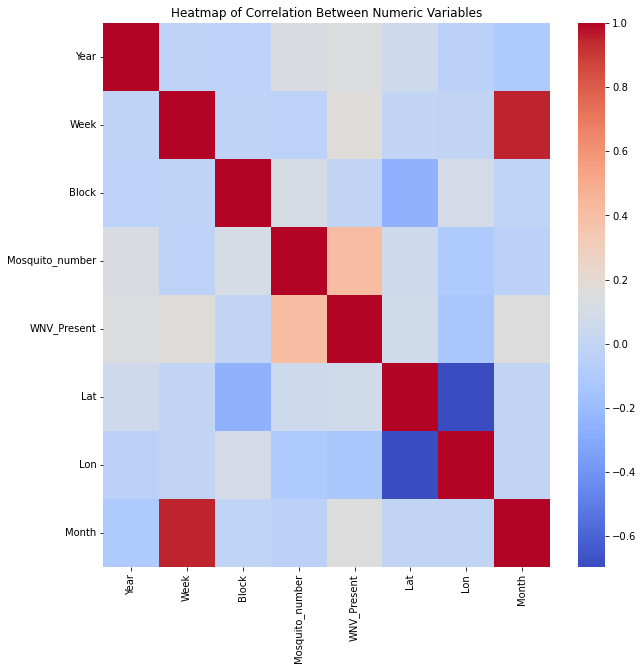

In [80]:
# creates a heatmap of correlation 
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Heatmap of Correlation Between Numeric Variables")
plt.show()

Though this output does not indicate any direct correlations between numeric attributes, apart from `Week` and `Month` (which is to be expected), we do still need to consider categorical attributes and formats that will not be picked up by the maths behind the correlation matrix.

We can also test the similarity of columns using the duplicated() method with a transform on the data. If any are the same this will return True.

In [81]:
print(df.T.duplicated())

Year               False
Week               False
Address_Block      False
Block              False
Trap               False
Trap_type          False
Date               False
Mosquito_number    False
Mosquito_ID        False
WNV_Present        False
Species            False
Lat                False
Lon                False
YRWeek             False
Month              False
dtype: bool


This output shows us that there are no cases where the columns are identical. This does not, however, mean that there are no redundancies. There are a few cases where we can see that columns give the same information - just named differently. 

Firstly we will look into similarities between `Mosquito_ID` and `Species`, as these both seem to suggest the species of mosquito. Comparing the columns directly will show us if there are simiality patterns. 

In [82]:
# Inital comparison of similar columns
df[["Mosquito_ID", "Species"]].head()

,Mosquito_ID,Species
0,Res,CULEX RESTUANS
1,Res,CULEX RESTUANS
2,Res,CULEX RESTUANS
3,Res,CULEX RESTUANS
4,Res,CULEX RESTUANS


There is clearly a, potential, link between these columns, as it seems that "Res" is shorthand for "CULUX RESTUANS". In order to check that every "Mosquito ID" is linked to a distinct "Species", we will do a groupby both columns and see if we find any instances of multiple "Species" for a "Mosquito ID", or the reverse. 

In [83]:
# Using a groupby will show us instances where rows with one "Mosquito Id" have multiple "Species", if no cases
# like this are found we know that keeping both is redudant because they both tell us about the mosquitoes species. 
df.groupby(["Mosquito_ID", "Species"])["Trap"].count()


Mosquito_ID  Species         
Pip          CULEX PIPIENS        5324
Res          CULEX RESTUANS      11450
Sal          CULEX SALINARIUS      222
Ter          CULEX TERRITANS       917
Name: Trap, dtype: int64

This output shows that every `Mosquito_ID` links to one distinct `Species` and seems to imply the same thing. For this reason we will drop "Mosquito ID" because this gives less information than the full latin species name reported in `Species`.

In [84]:
# Here we drop the "Mosquito_ID" column from axis=1 (the column axis) and using inplace=True means it is applied to the
# whole dataset. 
df.drop(["Mosquito_ID"], axis =1, inplace=True)

Now we will consider if there are similarities between `Address_Block` and `Block`, as they are both concerned with location. It also seems that there is a link between these, as the `Block` seems to be reported from the 
start of the `Address_Block` string.

In [85]:
# Considering similarities between "Address Block" and "Block" by looking at the first few rows of data.
df[["Address_Block", "Block"]].head() 

,Address_Block,Block
0,100XX W OHARE AIRPORT,100
1,52XX S KOLMAR AVE,52
2,58XX N WESTERN AVE,58
3,39XX N SPRINGFIELD AVE,39
4,131XX S BRANDON AVE,131


This seems to suggest that there is a correlation but we need to test this. First we will look at the number of unique values for each of the columns. If there are different numbers of unique value for the two columns, we will know that they are reporting different things. Again, we will use a groupby in order to expose the relationship between these two attributes.

In [86]:
#Grouping by clarifies if there are any instances of there being different values for 
                # Species for each value of Mosquito ID
print("Number of Unique \"Address Block\" values:", len(df["Address_Block"].unique()))
print("Number of Unique \"Block\" values:", len(df["Block"].unique()))

df.groupby(["Address_Block", "Block"])["Trap"].count().head()

Number of Unique "Address Block" values: 154
Number of Unique "Block" values: 87


Address_Block             Block
100XX W OHARE             100       178
100XX W OHARE AIRPORT     100      1565
101XX S STONY ISLAND AVE  101       369
104XX S OGLESBY AVE       104         1
104XX S VINCENNES AVE     104       138
Name: Trap, dtype: int64

As the number of unique values is different, there is clearly no exact similarity between these two columns. From the aggregated groupby output, we can see that there are instances where different `Address_Block` values are associated with the same `Block` value. For example `Block` 104 is associated with both `104XX S OGLESBY AVE` and `104XX S VINCENNES AVE`. These are two distinct addresseses, so keeping the `Address_Block` and `Block` attributes could not lead to redundancies because they are distinct. However, it seems that using `Address_Block` when considering location could be more exhaustive and therefore more accurate. The `Block` attribute is somewhat confusing because it does not given a consistent location. For this reason we will drop the `Block` attribute because it's information is held within the `Address_Block` attribute and it seems to not add any distinct, understandable value. 

In [87]:
# Here we are dropping the "Block" attribute because it does not bring any value.
df.drop(["Block"], axis =1, inplace=True)

As a final note, it could be argued that keeping `Year`, `Week` and `Date` creates some redundancies. However, it is useful to keep `Year` and `Week` for their functionality when looking at seasonal trends (as shown in our initial exploration of `Date` above). They are also useful from a computational load perspective. 

We will however look to see if the `Year` and `Week` values will give us a clearer understanding of the time span of the dataset.

### Missing Values

Out initial exploration showed that there are missing value in the dataset for `Lat` and `Lon`. Looking into the number of null values gives us an understanding of the amount of data missing from the dataset. 

In [88]:
print("The number of rows with missing data for each column:\n", df.isna().sum(), sep='') # we have missing data for latitude and longitude for 2924 datapoints

The number of rows with missing data for each column:
Year                  0
Week                  0
Address_Block         0
Trap                  0
Trap_type             0
Date                  0
Mosquito_number       0
WNV_Present           0
Species               0
Lat                2342
Lon                2342
YRWeek                0
Month                 0
dtype: int64


It is clear that the only missing data is for the latitude and longitude. It could be assumed that all data points missing latitude would also be missing longitude. To be sure that this is the case, we will compare the boolean arrays that identify missing values in each row (using the method .isna()), by using the numpy.array_equal() method to see if the boolean arrays are identical. If all `Lat` data points are also missing `Lon` data points the boolean arrays created by the `.isna()` method will be identical. 

In [89]:
# The numpy.array_equal() method returns a "True" if the arrays are identical
print("Is every missing Latitude associated with a missing Longitude:", 
      np.array_equal(df["Lat"].isna(), df["Lon"].isna())) 
                                                 
# Now we look at the propotion of missing data overall
prop_missing = ((df["Lat"].isna().sum()) / len(df)) * 100
print("Percentage Data Missing: ", round(prop_missing, 2), "%", sep='')

Is every missing Latitude associated with a missing Longitude: True
Percentage Data Missing: 13.07%


`Lat` and `Lon` are indicators of location, so looking at the `Address_Block` for the missing values may expose specific locations that are missing coordinate data. We can look more deeply into whether there a few specific locations that are missing data, or if all missing data is associated to a different data point. We will do this by grouping by `Address_Block` for rows with missing data. Adding the .size() method to this allows us to see how many data points for specific addresses are missing Latitude and Longitude data. 

In [90]:
df[df["Lat"].isna()].groupby("Address_Block").size()

Address_Block
100XX W OHARE             178
100XX W OHARE AIRPORT    1565
115XX S AVENUE L           36
30XX S HOYNE               12
43XX N ASHLAND             10
4XX W 127TH               270
65XX N OAK PARK AVE        17
79XX S CHICAGO            127
81XX S ASHLAND            116
98XX S AVENUE G            11
dtype: int64

As there are only ten locations with missing coordinate data, we can manually add this information (after extracting it from google). Because the data has built in anonymity, we used the 50th location for each address. This may allow for more accurate location data, given that we are unaware of the exact number. 

For example, 
10050 W OHARE was used to extract coordinate data for 100XX W OHARE. 

In [91]:
# All location data was extracted from google maps. 
df.loc[df["Address_Block"] == "100XX W OHARE", ["Lat", "Lon"]] = [41.97918417185854, -87.90603567116452]
df.loc[df["Address_Block"] == "100XX W OHARE AIRPORT", ["Lat", "Lon"]] = [41.97927587140582, -87.90599275843982]
df.loc[df["Address_Block"] == "115XX S AVENUE L", ["Lat", "Lon"]] = [41.68563982824378, -87.53667389381788]
df.loc[df["Address_Block"] == "30XX S HOYNE", ["Lat", "Lon"]] = [41.83675008186022, -87.67770701611565]
df.loc[df["Address_Block"] == "43XX N ASHLAND", ["Lat", "Lon"]] = [41.96144050852612, -87.66955066250219]
df.loc[df["Address_Block"] == "4XX W 127TH", ["Lat", "Lon"]] = [41.663756686541326, -87.63377020262799]
df.loc[df["Address_Block"] == "65XX N OAK PARK AVE", ["Lat", "Lon"]] = [42.00073387413292, -87.79582801611002]
df.loc[df["Address_Block"] == "79XX S CHICAGO", ["Lat", "Lon"]] = [41.750369573661345, -87.58445996029592]
df.loc[df["Address_Block"] == "81XX S ASHLAND", ["Lat", "Lon"]] = [41.74538943321954, -87.66370766029615]
df.loc[df["Address_Block"] == "98XX S AVENUE G", ["Lat", "Lon"]] = [41.71699287365592, -87.53166946029711]

Now we can check that this worked, by looking at what percentage of the data has missing values:

In [92]:
print("Proportion of Latitude Data Missing: ",((df["Lat"].isna().sum()) / len(df)) * 100,"%", sep="")

Proportion of Latitude Data Missing: 0.0%


## Initial Data Exploration <a id=init a>

In order to look more closely at what the attributes are storing and how they are distributed we will create two dataframes, one with all the categorical variables and one with all the numeric. 

Looking at the relationships between all the categorical variables and all of the numeric variables brings value in that it allows us to see how these interact. It gives a clearer value to the place of variables in context. We will
consider `Date`, `Year` and `Week` as numeric because we are considering date overall as numeric. 

We will create two dataframes: `nums_df` and `cat_df` in order to look at the relationship between all variables. To do this we will use a function called `num_cat_cols` to create lists of the numerical and categorical variables. Within this function we can establish that we are considering date values as numeric. 

In [93]:
nums_df, cats_df = ds_utils.num_cat_cols(df, datetime_is_numeric=True)

The Numeric columns: 
	Year,
	Week,
	Date,
	Mosquito_number,
	Lat,
	Lon,
	Month

The Categorical columns: 
	Address_Block,
	Trap,
	Trap_type,
	Species


# Numeric Variables

As an initial exploration we will create histograms for all of the numeric columns in order to see the spread of 
data within these. They are not perfectly executed as they are not for deep interpretation but rather for a quick 
view of what may be interesting to look deeper into.

Year Summary Statistics:
count    17913.000000
mean      2012.859320
std          3.734186
min       2007.000000
25%       2010.000000
50%       2013.000000
75%       2016.000000
max       2019.000000
Name: Year, dtype: float64


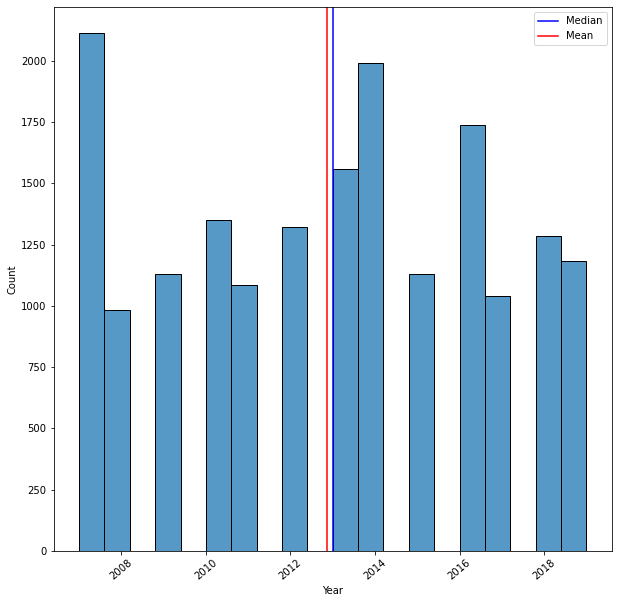

Week Summary Statistics:
count    17913.000000
mean        30.971641
std          4.373486
min         20.000000
25%         28.000000
50%         31.000000
75%         34.000000
max         40.000000
Name: Week, dtype: float64


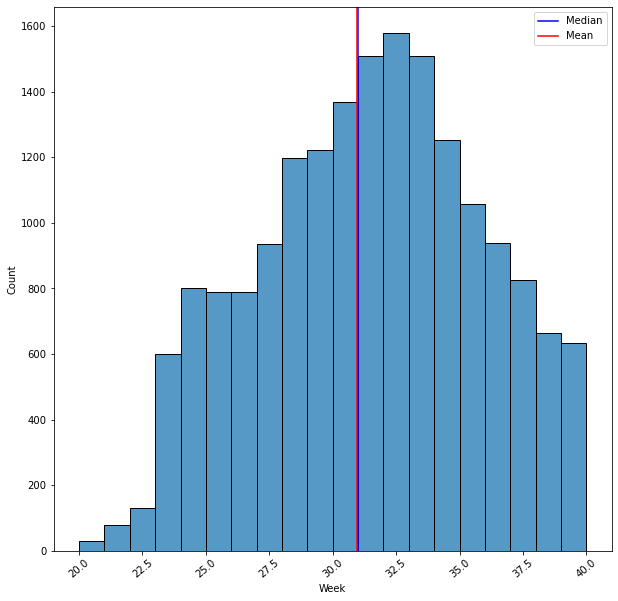

Date Summary Statistics:
count                            17913
mean     2013-06-13 13:05:12.302796544
min                2007-05-29 00:05:00
25%                2010-07-13 00:07:00
50%                2013-08-15 00:08:00
75%                2016-08-04 00:08:00
max                2019-09-26 00:09:00
Name: Date, dtype: object


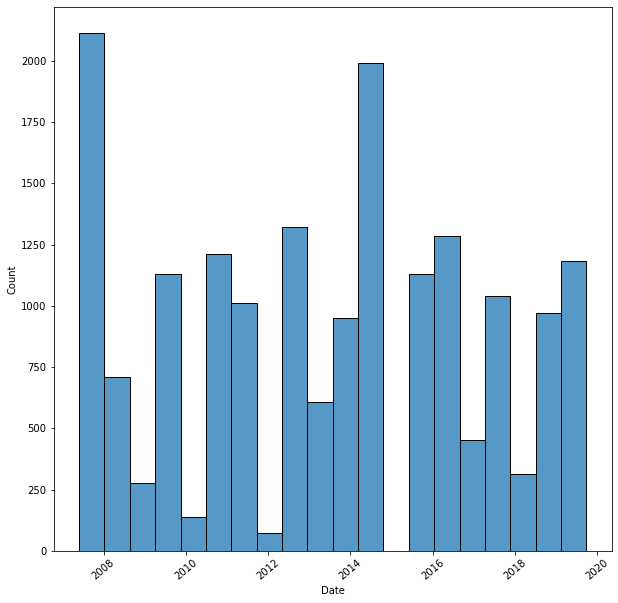

Mosquito_number Summary Statistics:
count    17913.000000
mean        10.626584
std         13.403571
min          1.000000
25%          2.000000
50%          4.000000
75%         14.000000
max         50.000000
Name: Mosquito_number, dtype: float64


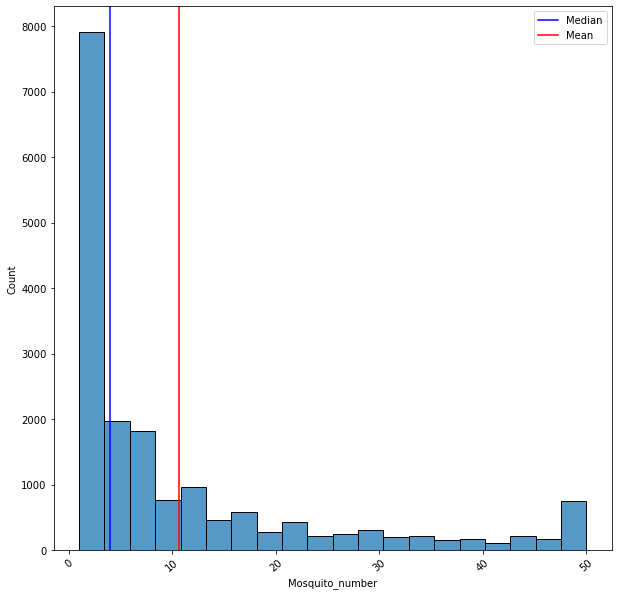

Lat Summary Statistics:
count    17913.000000
mean        41.849447
std          0.115124
min         41.644720
25%         41.745389
50%         41.867599
75%         41.964405
max         42.017801
Name: Lat, dtype: float64


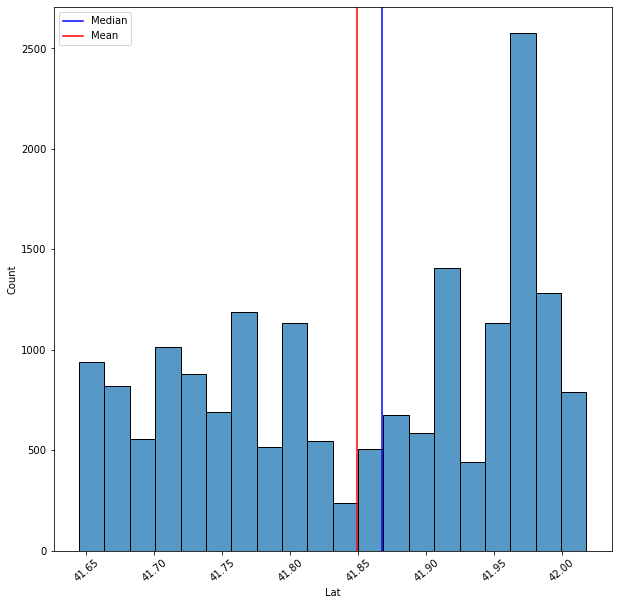

Lon Summary Statistics:
count    17913.000000
mean       -87.710354
std          0.097086
min        -87.906036
25%        -87.770837
50%        -87.701388
75%        -87.643076
max        -87.531051
Name: Lon, dtype: float64


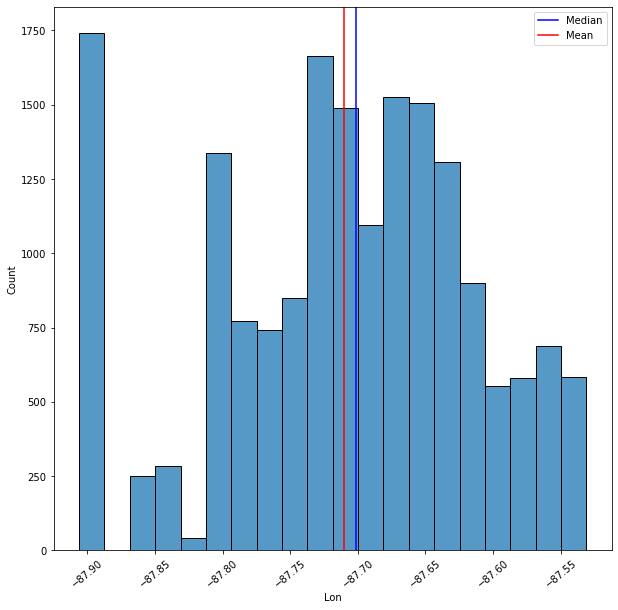

Month Summary Statistics:
count    17913.000000
mean         7.620052
std          1.006069
min          5.000000
25%          7.000000
50%          8.000000
75%          8.000000
max         10.000000
Name: Month, dtype: float64


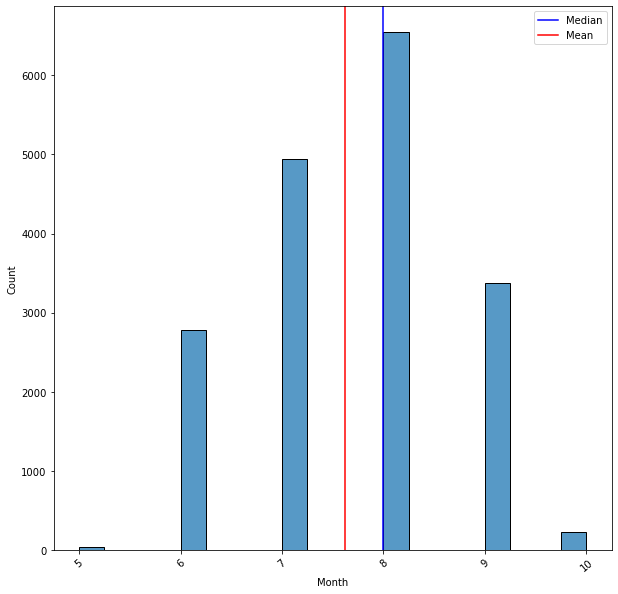

In [94]:
ds_utils.num_var(df[nums_df])

First glance of these histograms show that `Date` and `Year` are not uniformally distributed, meaning that there is not a consistent amount of data throughout the dataset - this may be the result of trends in the mosquito population
from year to year (potentially because of differences in rain fall). We will look more deeply into this. 

The distrbution of the `Week` variable is interesting as it shows bell shaped distibution with a peak in the middle of the summer. (Only weeks 20 to 40 of the year are reported (in general this aligns to mid-May to early October)). 

There is a clear right skew in `Mosquito_number` however, this histogram is not representative of the reality of the date. It considers the dataframe with the 50 mosquito maximum per data-point limitation. This means that the true number of mosquitos caught, with everything else being equal, is not represented. This also explains the jump at the largest bin (as these data points would represent the 50 mosquito over flow rows). As this histogram is not representative of the data we will look more deeply into `Mosquito_number`

The distribution of `Lat` and `Lon` is somewhat uninterpretable, as these attributes are location so their numeric 
value should have little reason.

Now we will look more deeply into `Mosquito_number`.

It is important to remember that, from our above discovery, mosquito number does not show the total number of mosquitos caught in each trap for each date, but rather the number of a specific species caught at each trap for a specific date/time. In order to look at the data more fairly we will create a dataframe that groups by every attribute 
except the `Mosquito_number`. Then we will count the number of mosquitos, will all else being equal, in order to create a truly representative histogram.

In [95]:
# Creating a count of Mosquito_number by grouping by all attributes except "Mosquito_number" and then summing 
# "Mosquito_number"
mos_df = df.groupby(["Year","Week","Address_Block","Trap","Trap_type","Date","WNV_Present", "Species","Lat","Lon","YRWeek"])["Mosquito_number"].sum().to_frame().reset_index()

After creating this new dataframe, it is useful to see some summary statistics on the distrbution of the mosquito number before looking at a histogram.

In [96]:
# The describe() method returns summary statistics on the called pandas column.
mos_df["Mosquito_number"].describe()

count    17389.000000
mean        10.946805
std         17.781567
min          1.000000
25%          2.000000
50%          4.000000
75%         13.000000
max        500.000000
Name: Mosquito_number, dtype: float64

From this we can see that there should be a right skew - as the median (reported as 50%) is 4.00 and the mean is larger at 10.95. The larger mean implies that there are very large values that are driving the average number up. 

We will now create a histogram with this newly formed dataframe in order to see the true distrbution of "Mosquito_number" and show the mean and median of the distribution as red and blue lines, respectively.

The mean "Mosquito_number" is: 10.946805451722353
The median "Mosquito_number" is: 4.0


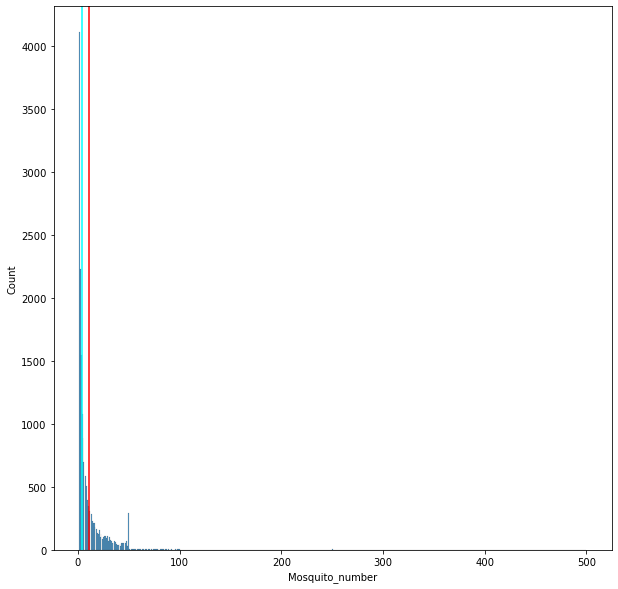

In [97]:
# Creating a histogram of 
sns.histplot(mos_df["Mosquito_number"]) # Plots histogram of 
plt.axvline(mos_df["Mosquito_number"].mean(), color='red') # Plots mean line on histogram
plt.axvline(np.median(mos_df["Mosquito_number"]), color='cyan') # Plots median line on histogram

print("The mean \"Mosquito_number\" is:",mos_df["Mosquito_number"].mean())
print("The median \"Mosquito_number\" is:",np.median(mos_df["Mosquito_number"]))

This histogram is far more representative of the data, as it shows that there is a right skew and that there is far more data below 50 than above it. 

Finally, we will look at `Date` in order to understand the length of time the data spreads. Though this is not strictly numerical, it is the closest to being continuous data of all the attributes other than `Mosquito_number`. It is also a good idea to look into date because our exploration has shown that there are multiple inputs for certain dates (because of multiple species inputs for the same trap at the same time).

In [98]:
# By setting the datetime_is_numeric parameter to True, we can see the distribution of the dates in the dataset. 
df["Date"].describe(datetime_is_numeric=True)

count                            17913
mean     2013-06-13 13:05:12.302796544
min                2007-05-29 00:05:00
25%                2010-07-13 00:07:00
50%                2013-08-15 00:08:00
75%                2016-08-04 00:08:00
max                2019-09-26 00:09:00
Name: Date, dtype: object

In [99]:
print("The number of unique Date values is:", len(df["Date"].unique()))

The number of unique Date values is: 286


This output treats "Date" as numeric, based on the condition passed in. Is helpful to note that the first data point comes on 29/05/2007 and the last is on 26/09/2019, meanning the data spans 13 years. The start and end dates bookending the summer seems to imply that there may a limitation to the time of year that data is recorded in. The number of unique date values is 286, meaning that there are fewer date values than expected. However,  it may be the case that testing was done at the same time for multiple traps and species.

Looking into how date is distributed requires diving deeper into how data is distributed by year and by week. Luckily attributes for those columns exist and can be used in order to gain a better understanding of `Date`. 

In the below visualisations we will look into the distributions of the amount of data collected by `Date`, `Year` and `Week`. This does not represent the number of mosquitos caught, though it is indicitive of patterns, but rather the amount of times that data was collected at different time periods.

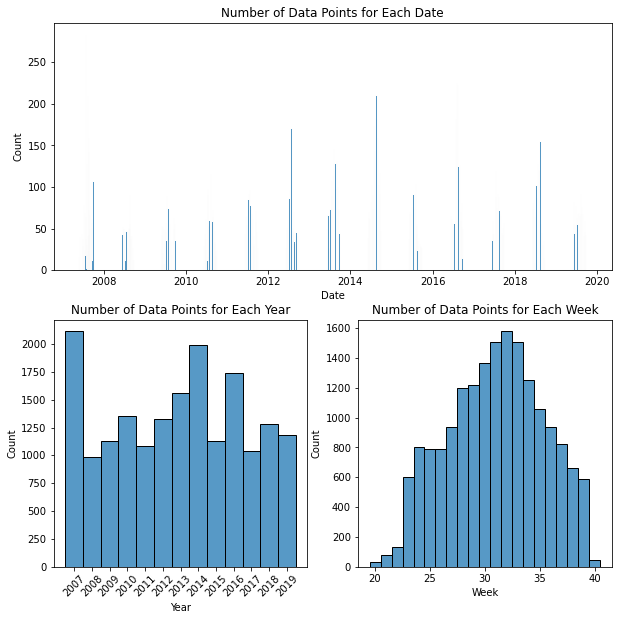

In [100]:
# Creating a grid for the histograms of "Date", "Year" and "Week"

# GridSpec initialises a visualisation that allows us to control subplots
gridspec.GridSpec(2,2)

# We put the first plot, "Date" histogram, in the highest row and spreading two columns. 
plt.subplot2grid((2,2), (0,0), colspan=2, rowspan=1)
sns.histplot(df["Date"], cbar=df["Week"], discrete=True)
plt.title("Number of Data Points for Each Date")

# We put the "Year" histogram in the first column of the second row
plt.subplot2grid((2,2), (1,0))
sns.histplot(df["Year"], discrete=True)
plt.xticks(ticks = df["Year"].unique(), rotation=45)
plt.title("Number of Data Points for Each Year")

# We put the "Week" histogram in the second column of the second row
plt.subplot2grid((2,2), (1,1))
sns.histplot(df["Week"], discrete=True)
plt.title("Number of Data Points for Each Week")

plt.show()

Now, this distrbution tells a strange story about how consistently data was collected. It seems inconsistent both in frequency of data collection and in amount of times data was collected in the same period of time. Looking more specifically into the year showed that data was collected every year, but not the same amount. This is may be the result of there being varying mosquitos in different year (potentially based on rainfall). It is also helpful to see if the inconsistent trend through the whole date period had trends within the years themselves. Looking at week proves this to be true, as there is a clear overall higher number of data points collected around weeks 30-35. The labelling of these weeks themselves also seems to suggest that there is a seasonal trend. Only weeks 20 to 40 of the year are reported (in general this aligns to mid-May to early October). 

The inconsistencies in the amount of data collected will be a direct result of the fact that data was only collected when mosquitos were found. If data had been collected when mosquitos were not found, these distributions may be more uniform.

### Categorical Variables

Now we will look into categorical variables and their distributions. We will use the `cats_df` variable to create a 
dataframe with only the categorical variables, and then pass this into a `ds_utils` function named `cat_vars` which creates barplots of the distributions. 

Number of Unique Address_Block Values: 154
Number of Unique Trap Values: 190
          Trap_type
GRAVID        17170
CDC             533
SENTINEL        209
OVI               1


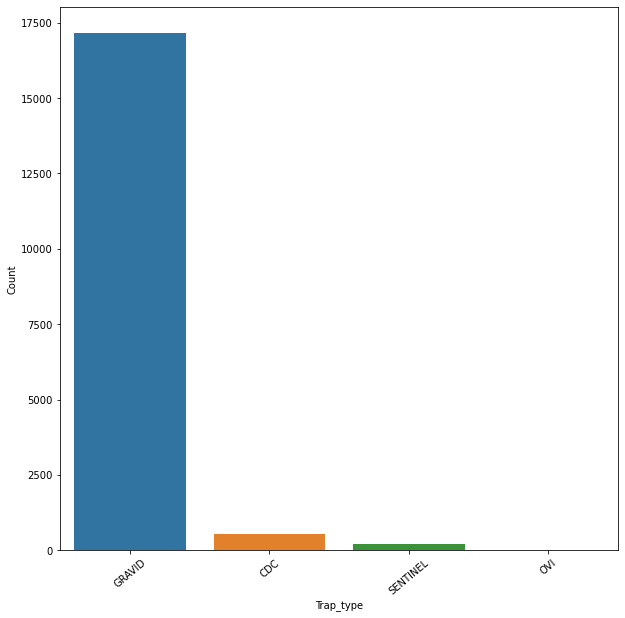

                  Species
CULEX RESTUANS      11450
CULEX PIPIENS        5324
CULEX TERRITANS       917
CULEX SALINARIUS      222


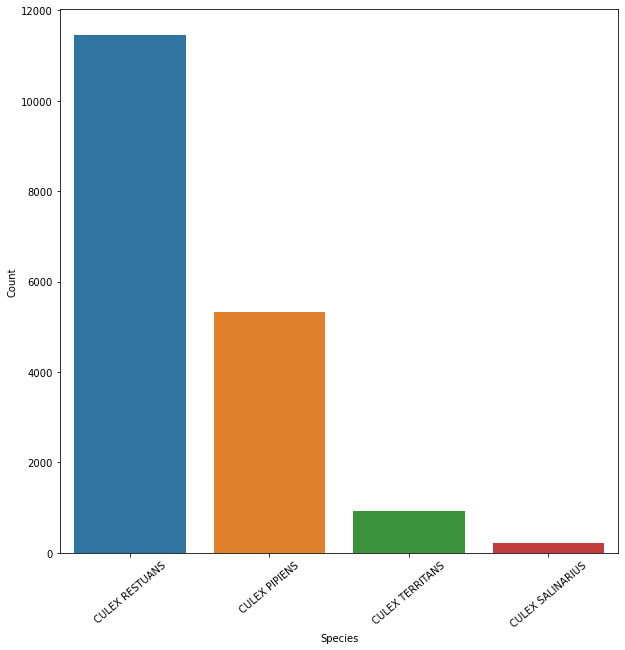

In [101]:
ds_utils.cat_var(df[cats_df])

Though not perfect, these histograms give a quick view into the prevalence of the categorical variables within the dataset.

Looking at the `Address Block` shows us that there is a large spread in locations, with differing number of data points collected at each locations. This makes intuitive sense, as even if traps are set up all over the city, there will be locations with higher chances of catching mosquitos because the mosquito population would be larger there. A similar argument for understanding the inconsistent distribution of data points at each Trap can be made, as traps in different locations will be more or less prone to mosquitos being around.

The `Trap type` barplot shows us that the most common trap in the dataset is the GRAVID, with far more appearances than the CDC, SENTINEL AND OVI. This could be indicative of the GRAVID trap being the best at catching mosquitoes, but this requires further investigation. 

The `Species` barplot shows us that the most common species in the dataset is Culex Restuans, with almost double the number of appearances as CULEX PIPIENS, the second most common. This is not to say, at this point, that this is the most common species of mosquito, but rather that this species has the most data entries. It may be the case that these data entries are all 1 mosquito and that the CULEX PIPIENS are caught in groups of 30. This requires further invetigation. 

Finally, the `WNV_Present` barplot shows that there are far more rows with `False` labels than `True`. Again, this is somewhat similar to the species bar plot in that this may be representative of the proportion of mosquitos carrying WNV or not, but the bar plot is only telling us that there are more rows with `False` indications than `True`. It could be the case that `True` rows have far more or far less mosquitos than `False` rows. Again, this needs further investigation. 

First we will look into `Species`, in order to understand the number of mosquito species in and see how many of each is in the dataset. We will look into how many rows occur for each species, and then dive into how many mosquitos overall are of each species. 

In [102]:
# The number of each row containing each species.
df["Species"].value_counts()

CULEX RESTUANS      11450
CULEX PIPIENS        5324
CULEX TERRITANS       917
CULEX SALINARIUS      222
Name: Species, dtype: int64

Culex Restuans appears in the most rows of the dataset. However, in order to see how many mosquitos of each species were found we need to do a little bit more manipulation. Below we group by `Species` and aggregate mosquito number in order to find how many mosquitos of each species were observed.

In [103]:
# Creating a DataFrame called spec_df to count how many of each species were found
spec_df = df.groupby("Species")["Mosquito_number"].sum().to_frame().reset_index()
spec_df

,Species,Mosquito_number
0,CULEX PIPIENS,58307
1,CULEX RESTUANS,129791
2,CULEX SALINARIUS,446
3,CULEX TERRITANS,1810


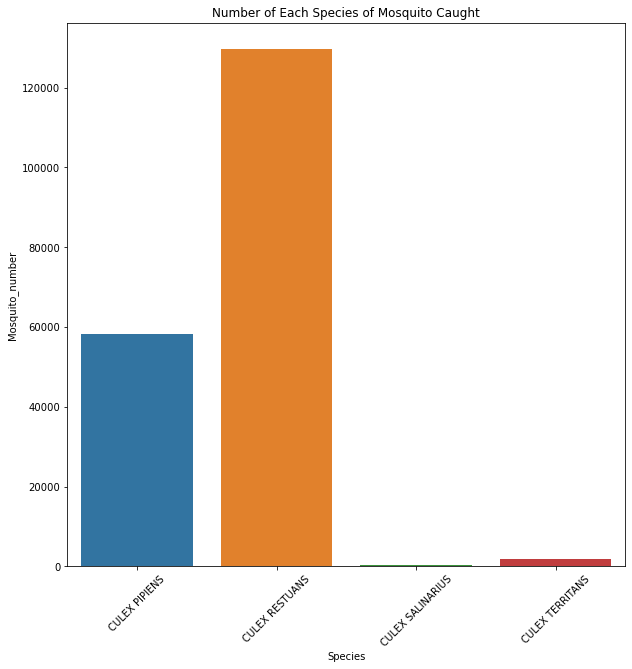

In [104]:
# This code outputs a visualisation of the number of mosquitos of each species in the dataset
sns.barplot(x="Species", y="Mosquito_number", data=spec_df)
plt.xticks(rotation=45)
plt.title("Number of Each Species of Mosquito Caught")
plt.show()


Overall, Culex Restuans mosquitos do appear the most, with about 2/3s of the mosquitos caught in the entire dataset being of this species. Checking that indeed Culex Restuans is the most prevalent mosquito is important as it shows us the true distribution of the different mosquito species. 

Interestingly, the number of Culex Restuans and Culex Pipens mosquitos is higher than the number of these Species appearances meaning that these are averagely caught in higher groups than the other two species, Culex Salinarius and Culex Territans. 

Next we look into further into the categorical variable `Trap type`. This will allow us to see which traps are used most and if there are any infrequently used traps.

In [105]:
print(df["Trap_type"].value_counts())

GRAVID      17170
CDC           533
SENTINEL      209
OVI             1
Name: Trap_type, dtype: int64


From this result we can see that most mosquito traps used were the GRAVID type. Very few were any of the other types, CDC, Sentinel and only one was OVI. It could be considered to remove this datapoint as it is very unique and may have a bias. We will look to see what form this datapoint takes. 

In [106]:
df.loc[df["Trap_type"] == "OVI"]

,Year,Week,Address_Block,Trap,Trap_type,Date,Mosquito_number,WNV_Present,Species,Lat,Lon,YRWeek,Month
15392,2007,23,5XX S CENTRAL AVE,T167,OVI,2007-06-29 11:06:00,1,False,CULEX PIPIENS,41.872873,-87.764737,2007-23,6


Only one mosquito was caught in this trap in 2007, of the second most popular species of mosquito. One mosquito being caught makes it impossible to see how this trap's presence had an impact on the WNV over time, or how these traps fair with different species. Because there is only one instance of this trap and only one mosquito was killed it makes sense to remove this from the dataset. This is also supported by the fact that the West Nile Virus was not present in the one mosquito caught by the OVI trap and the OVI traps was last used in the first year of this 13 year dataset. 

Below is the code for removing this datapoint. 

In [107]:
# We use the index of this data point to drop it, by passing the index into the .drop() method
df.drop(index=df[df["Trap_type"] == "OVI"].index, inplace=True)

As a note: We now have 17913 Rows and 12 Columns

Now we can look at the prevalence of the taps in the dataset. Doing a histogram with counts shows us how many times each trap appears in the dataset. But, again, it makes more sense to see how many mosquitos were caught by each type of trap. For this reason we will group by trap and look at the number of mosquitos caught at each trap.

In [108]:
# We will use a groupby to look at the number of mosquitos caught in each type of trap
trap_df = df.groupby("Trap_type")["Mosquito_number"].sum().reset_index()

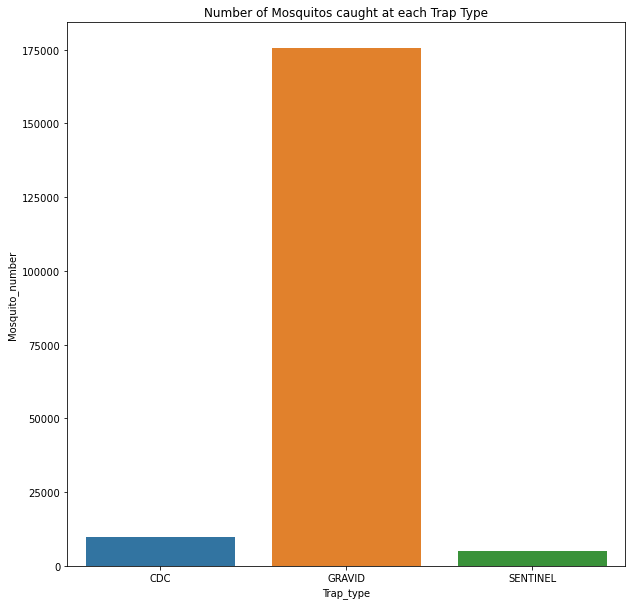

In [109]:
# This barplot shows the number of mosquitos caught at each trap type.
sns.barplot(x="Trap_type", y="Mosquito_number", data=trap_df, estimator=sum, ci=None)
plt.title("Number of Mosquitos caught at each Trap Type")
plt.show()

This shows that by far the GRAVID trap type catches the most mosquitos. It would now be interesting to see if there are trends in which moquitos get caught by which traps. We will consider looking at this in our advanced exploratory data analysis. 

## Re-Indexing with the Date Column
As mentioned above we will use the `Date` column as an index in order for more easy data manipulation. The code below re-indexes the data using the `Date` column. 

In [110]:
# Using the set_index() method allows us to choose "Date" to be our new index.
df.set_index(keys="Date", inplace=True)

We will also create a Pandas DataFrame with the true number of mosquitos caught for each row, with all else being equal. This will help with further data manipulation.

In [111]:
# Here we are creating a dataframe with the number of mosquitos grouped with all other attributes being equal.
# We, again, set the index to "Date" as this is convention.
df_comb = df.groupby(["Year","Week","Address_Block","Trap","Trap_type","Date",
                      "WNV_Present", "Species","Lat", 
                      "Lon","YRWeek"])["Mosquito_number"].sum().to_frame().reset_index().set_index(keys="Date")

We can now remove the `YRWeek` variable. Though useful for our EDA, it is not helpful in our modelling because it is a ordinal marker of the week throughout the dataset (almost like an index). 

In [112]:
df_comb = df_comb.drop(columns=['YRWeek'])

## Exporting Cleaned Data

Now that we have a cleaned and prepared dataset, we can export it for later use in modelling. This can be done now, as we will not make any changes to the form of the data through Exploratory Data Analysis. 

In [113]:

# export pandas dataframe to csv file 
df_comb.to_csv('data/mosquito_preprocessed.csv')

## Exploratory Data Analysis <a id=explo a>


Looking into the relationships between attributes will give us a clearer view of patterns of West Nile Virus in the Mosquito population in Chicago. 

Now we will begin to explore the relationship between attributes more closely. To start, we will investigate how `Mosquito_number` varies with date. From our Data Wrangling it is clear that this could be a major influence on number of mosquitos caught.
    
Trying to look directly at the number of mosquitos and date leads to some issues of interpretatility. It is hard to understand the trends, so we have decided to use the `YRWeek` attribute in place of date. This will allow for easier visual understanding and reduce computational load (when we first do a groupby in order to visualise the number of 
mosquitos caught in each week of the entire dataset). 


The first line graph below shows the direct relationship between distinct week and number of mosquitos. It hits at trends across years and across the seasons of each year, so two additional line graphs were created. One for the trend of mosquito number by year, and one by the mosquito number by week (aggregating every week for the 13 years of the dataset).

In [114]:
# First we groupby the attributes we are hoping to compate with mosquito number; "Year", "Week" and "YRWeek"
df_yrwk = df.groupby(["Year", "Week", "YRWeek"])["Mosquito_number"].sum().to_frame().reset_index()
df_yrwk

,Year,Week,YRWeek,Mosquito_number
0,2007,21,2007-21,30
1,2007,22,2007-22,99
2,2007,23,2007-23,60
3,2007,24,2007-24,147
4,2007,25,2007-25,108
...,...,...,...,...
227,2019,35,2019-35,288
228,2019,36,2019-36,173
229,2019,37,2019-37,373
230,2019,38,2019-38,167


In [115]:
# Here we are creating a list for the location of our x axis ticks in the lineplot of mosquito number by Date
yrs_Date = ["2007-30","2008-30","2009-30","2010-30","2011-30","2012-30","2013-30","2014-30","2015-30",
            "2016-30","2017-30","2018-30","2019-30"]
    

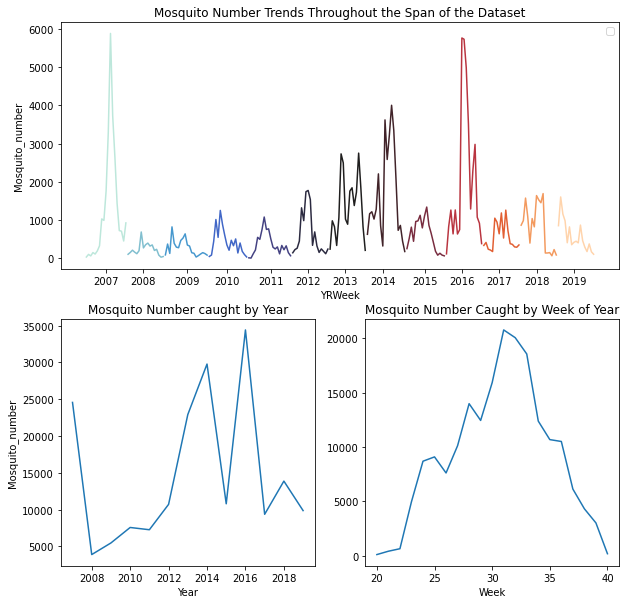

In [116]:
# Here we are creating a visualisation with subplots 
gridspec.GridSpec(2,2)

# Our YRWeek lineplot will take up two columns of the subplot, as this will allow for more readability.
plt.subplot2grid((2,2), (0,0), colspan=2, rowspan=1)
sns.lineplot(x="YRWeek", y="Mosquito_number", hue="Year", palette = "icefire", data=df_yrwk)#, hue="Week")
plt.xticks(ticks=yrs_Date, labels=[2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
plt.legend(labels=[])
plt.title("Mosquito Number Trends Throughout the Span of the Dataset")

# The Year subplot will go in the first column of the second row
plt.subplot2grid((2,2), (1,0), colspan=1, rowspan=1)
sns.lineplot(x="Year", y="Mosquito_number", estimator="sum", data=df_yrwk, ci=None)
plt.title("Mosquito Number caught by Year")

# The week subplot will go in the second column of the first row
plt.subplot2grid((2,2), (1,1), colspan=1, rowspan=1)
sns.lineplot(x="Week", y="Mosquito_number",estimator="sum", data=df_yrwk, ci=None)
plt.title("Mosquito Number Caught by Week of Year")
plt.ylabel("")


plt.show()

This above plots show us the trends in number of mosquitos caught throughout the dataset. It is clear that there are years and weeks that have a higher number of mosquitos caught. The first visualisation shows that there are definitely years with less mosquitos caught - namely from 2008 until 2012 when the number began to increase. 2007 and 2016 are by far the highest mosquito count years, both with peak weeks above 5000 caught. However, the Year by mosquitos caught graph shows that those 2007 and 2016 had the highest peak weeks, 2014 had consistently high mosquitos caught throughout the season, with an annual total of around 30000 (which is higher than 2007). 

This suggests that there are years with higher peaks, in other words a wider spread of mosquitoes caught per week, and there are years with lower peaks but more consistently caught mosquitos throughout the summer. Looking at the number of mosquitos caught by week, in total, it is clear that the peak usually comes after week 30 (or around the end of July). It makes sense that there are more mosquitos in the summer as temperatures are far higher in Chicago than in the Spring and Autumn. (In April 2012 the average temperature was 50 degrees fahrenheit , July's was 81.1, and October's was 51.5 - https://www.weather.gov/lot/October_Temperature_Rankings_Chicago). My initial research shows that mosquitos function far better in temperatures above 80 degrees and cannot function below 50 degrees. Adding temperature to this dataset for year and week could allow for a greater understanding of the behavior of mosquitos across the entire date range. 

From our exploration we have seen that there a multiple species of mosquitos found in Chicago and that there may be differences in number caught - this begs the question of whether there are specific species of mosquitos that are more likely to carry WNV and therefore a higher risk. We will firstly look into the relationship between species and WNV in order to uncover any potential links.

In order to do so we will create a new dataframe that groups by both `Species` and `WNV_Present`. This grouping will be aggregated by the number of Mosquitos caught, giving us the total number of mosquitos caught of all four species and WNV test outcomes. (Over-flow rows is not an issue in this case as we are aggregating without considering the date that the specimen was caught). 

In [117]:
# Grouping by Species and WNV_Present allows us to create all possible combinations of these two and then count the
# number of mosquitos caught in each combination. 
df_wnv = df.groupby(["Species","WNV_Present"])["Mosquito_number"].sum().to_frame().reset_index()

From our above exploration we know that Culex Restuans is by far for most common species caught, with more than double 
the presence of the next most commom, Culex Pipiens. Looking into how many of each species has WNV present is helpful, but thinking about the proportions of each species will give a clearer image of the prevalence of WNV within each species. In order to look at proportion we will sum the total number of each species and then divided the number of positive and negative results by these to find the proportions. We will also add labels to each bar to represent the actual number of mosquitos that fall into these categories. 

In [118]:
# Next we will create a groupby to count all of the mosquitos within each species, we could do this using the original 
# dataset, but this smaller frame means there is far less computational load. 

spec_count = df_wnv.groupby("Species")["Mosquito_number"].sum() # Summing total mosquitos for each species

# We will add these totals back to our dataframe using a left join, so that we add the species total to both rows 
# with the species (the positive and negative rows). Using the _species_total suffix allows us to distingusih between the 
# total for mosquito number by outcome and species and by just species. 
df_wnv = df_wnv.merge(spec_count, how="left", on="Species", suffixes=["", "_species_total"])


In [119]:
# Creating the "prop" attribute allows us to see the proportion of mosquitos, for each species, that has either a 
# positive or negative result from the WNV test. 
df_wnv["prop"] = df_wnv["Mosquito_number"] / df_wnv["Mosquito_number_species_total"]

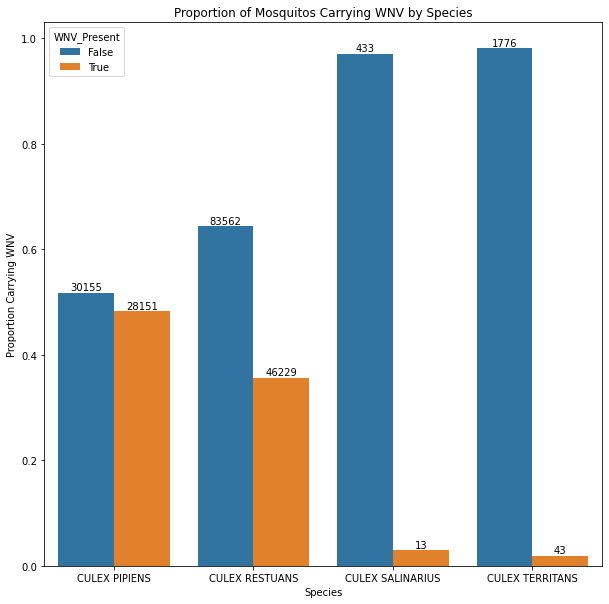

In [120]:
# This barplot shows the proportion of positive WNV mosquitos for each species
ax = sns.barplot(x="Species", y="prop", hue="WNV_Present", data=df_wnv, dodge=True)#, color="Mosquito_number")
ax.set_title("Proportion of Mosquitos Carrying WNV by Species")
ax.set_ylabel("Proportion Carrying WNV")

# In order to set the actual number of mosquitos for each Species and WNV presence we need to use patches in order
# to get the placement for each bar.
patch = ax.patches

# We need to hard code the labels for the bars in order to ensure the correct value is associated with the correct bar
labels = ["30155", "83562", "433", "1776", "28151", "46229", "13", "43"]

# Then we iterate over the patches and the labels in order to place the bars in the correct locations
for patch, labels in zip(patch, labels):
    height = patch.get_height()
    ax.text(
        patch.get_x() + patch.get_width() / 2, height+0.001, labels, ha="center", va="bottom"
    )
plt.show()


From this we can clearly see that the Culex Pipiens has the highest WNV positivity rate, though it is not the most commonly found mosquito in the dataset. The most commonly found mosquito is a Culex Restuans without WNV. This is also positive as it suggests that the mosqutio a human is most likely to interact with is does not have the highest chance of carrying the WNV. It is also clear from this at the two least prevalent species, Culex Salinarius and Culex Territans have very low likelihoods of carrying WNV.

This may be the result of the fact that there are so few of them. If the assumption is made that mosquitos tend to stay with their species, it is less likely that a Salinarius or Territans come in contact with a Pipiens or Restuans that carries WNV than one that does (given the proportions of WNV presence are lower than 50% for both). Because Pipiens and Restuans are far more common, and more likely to interact with their own species, they are more likely to contact a WNV positive specimen, and so this would build on itself. 

There may also be genetic or other spacitial factors that make the Pipiens and Restuans more susceptible to WNV. 

Next we will consider the relationship between `Mosquito_number` and `Trap type`. This relationship will indicate to us the success of each type of trap at catching mosquitos. It is very helpful to gain an understanding of this relationship, as it will allow us to see whether there are traps that perform better than others. 

From our earlier exploration we know that the GRAVID Trap appears most in the dataset and that, overall, GRAVID traps caught the most mosquitos. However, this does not express the distribution of number of mosquitos caught by each trap. Now, looking at the number of mosquitos caught at each trap in a boxplot will allow us to see the distribution of the number of mosquitos caught by the different traps at a time. We will use the row-combined dataframe here, meaning that all-else-being-equal rows are combined when counting mosquito number.

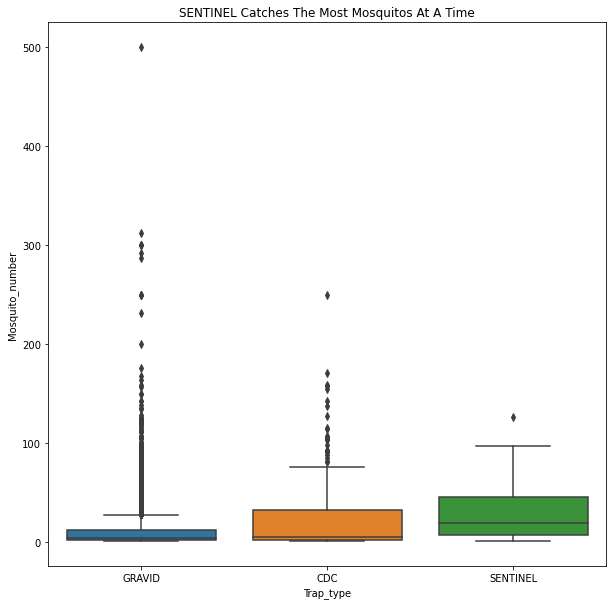

In [121]:
# This boxplot shows the distribution of the number of mosquitos caught by each trap 
sns.boxplot(data=df_comb, y="Mosquito_number", x="Trap_type")#, hue="WNV_Present")
plt.title("SENTINEL Catches The Most Mosquitos At A Time")
plt.show()

It is unexpected that on average SENTINEL traps caught more mosquitos. However, when considering the number of GRAVID traps across the city this begins to make sense. If there are far more GRAVID traps in locations with few mosquitos, the distribution of mosquitos caught by each trap would be skewed towards less mosquitos than the SENTINEL trap. However, the GRAVID trap does have the greatest outliers - meaning that the highest number of mosquitos tested at oncee was from a GRAVID trap.

Further exploration into the location and sizes of these traps across the city will allow for a better picture of why traps catch a higher number of mosquitos on average. There is also the consideration of frequency of testing. There is little information in the dataset as to whether there is a convention for frequency of trap specimen testing. Perhaps there may be a bias in the number of times mosquitos at each location were checked or tested. Again, further investigation into the location and frequency of testing will allow for greater understanding.

Finally, we can look at how prevalent the differnt `Species` are across the season, by looking at `Week`. Though we know that the Culex Restuans is the most common mosquito in the dataset, there may be different mosquito prevalences throughout the season. In order to look into this, we will aggreagate the data by Species and Week and find number of mosquitos for each combination. Then we will look at the number of mosquitos for each species across the season. 

In [122]:
# We group by Species and Week to find the number of mosquitos for each combination
df_wkspec = df.groupby(['Species', 'Week'])["Mosquito_number"].sum().to_frame().reset_index()

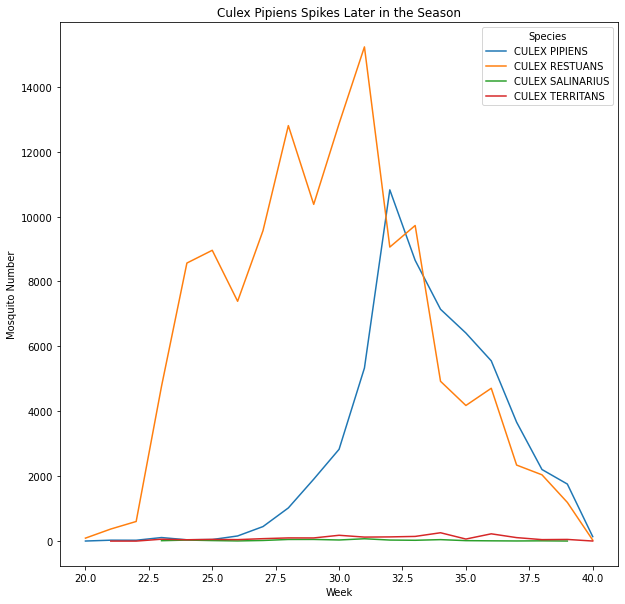

In [123]:
# This code creates a lineplot with the different number of each species of mosquito across the weeks of the year
sns.lineplot(x="Week", y="Mosquito_number", hue="Species", estimator=sum, data=df_wkspec)
plt.title("Culex Pipiens Spikes Later in the Season")
plt.ylabel("Mosquito Number")
plt.show()

This lineplot shows us that, as we know, Culex Restuans is the most prominent species of mosquito throughout the dataset and through each season. However, it is clear from this graph that, though Culex Restuans peaks at the end of July (week 30), it is fairly consistently in its bell curve through the season - with the exception that it is slightly more skewed to the first half of the season. On the other hand Culex Pipiens is more skewed towards the end of the season. In fact the graph shows that, in general, there are very few Culex Pipien mosquitos until a quarter way through the season when the number starts to increase exponentially until it peaks in August (after week 30). Then it has a steady, but not steep decline to the end of the season. The difference in prevalence, by season, between the two most common mosquitos is slightly puzzling. 

Initial thoughts suggest a differnce in sensitivity to temperature. Perhaps Culex Pipiens require a higher temperature to become active than Culex Restuans. Or are more sensitive to temperature overall and need specific conditions to become active. Some research has shown that there are differences in temperature sensitivity between species of mosquito so this may explain the difference in prevalence across the season. However, I would need to do deeper research to confidently conclude that this is the motivation. 

## Conclusion <a id=conclu a>

There are clear areas of this dataset where we can see that the West Nile Virus appears the most. We have found that the most common species of mosquito is the Culex Restuans, with the Culex Pipiens being second. These two species really drive the spread of WNV in Chicago, as the other two Culex Salinarius and Culex Territans have a total of 56 WNV positive mosquitos across the 13 season spanning dataset. Though Restuans is the most common species, WNV is found in Pipiens at a higher proporion (overall Restuans has more positive WNV specimen). Therefore, it is fortunate that the Pipiens are only truly present in the second half of the season (as if they were more present throughout the whole season the virus may spread more easily). The Restuans is present throughout the whole season, from the 20th week of the year until the 40th. There is a clear seasonal difference in the presence of mosquitoes, most likely as a result of their differing sensitivity to temperature. 